#### Problem 1

##### 1-(a)

In [11]:
import sympy
from sympy import symbols, diff

from IPython.display import display

t = symbols("t")

x = 0.7 * t**3 - 3 * t**2 + 5 * t
v = diff(x)
a = diff(v)

display(x, v, a)

velocity_sympy = v.subs(t, 2.0)
acceleration_sympy = a.subs(t, 2.0)

print("t = 2 --> ")
print("velocity : ", velocity_sympy)
print("acceleration : ", acceleration_sympy)




0.7*t**3 - 3*t**2 + 5*t

2.1*t**2 - 6*t + 5

4.2*t - 6

t = 2 --> 
velocity :  1.40000000000000
acceleration :  2.40000000000000


##### 1-(b)

$$ f(x + h) = f(x) + hf'(x) + \frac{h^{2}}{2!}f''(x) + \dots $$
$$ f(x - h) = f(x) - hf'(x) + \frac{h^{2}}{2!}f''(x) + \dots $$
$$ f(x + 2h) = f(x) + 2hf'(x) + \frac{(2h)^{2}}{2!}f''(x) + \dots $$
$$ f(x - 2h) = f(x) - 2hf'(x) + \frac{(2h)^{2}}{2!}f''(x) + \dots $$


##### first forward difference approximation
##### $$ f'(x) = \frac{f(x + h) - f(x)}{h} + O(h) $$
##### $$ f''(x) = \frac{f(x + 2h) - 2f(x + h) + f(x)}{h^{2}} + O(h) $$

##### first central difference approximation
##### $$ f'(x) = \frac{f(x + h) - f(x - h)}{2h} + O(h^{2}) $$
##### $$ f''(x) = \frac{f(x + h) - 2f(x) + f(x - h)}{h^{2}} + O(h^{2}) $$

In [12]:
def f(t) : 
    return 0.7 * t**3 - 3 * t**2 + 5 * t

t = 2.0
h = 0.01

FFD_v = (f(t + h) - f(t)) / h
FFD_a = (f(t + 2 * h) - 2 * f(t + h) + f(t)) / h**2
FCD_v = (f(t + h) - f(t - h)) / (2 * h)
FCD_a = (f(t + h) - 2 * f(t) + f(t - h)) / h**2

print("First forward difference approximiation : ")
print("velocity : ", FFD_v)
print("acceleration : ", FFD_a, end="\n\n")


print("First central difference approximation : ")
print("velocity : ", FCD_v)
print("acceleration : ", FCD_a)


First forward difference approximiation : 
velocity :  1.412070000000032
acceleration :  2.442000000009159

First central difference approximation : 
velocity :  1.4000700000000421
acceleration :  2.3999999999979593


##### 1-(c)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def v(t) : 
    return 2.1 * t**2 - 6 * t + 5

def a(t) : 
    return 4.2 * t - 6

t = 2.0
h = 0.01
analytic_v = v(t=t)
analytic_a = a(t=t)
FFD_v = (f(t + h) - f(t)) / h
FFD_a = (f(t + 2 * h) - 2 * f(t + h) + f(t)) / h**2
FCD_v = (f(t + h) - f(t - h)) / (2 * h)
FCD_a = (f(t + h) - 2 * f(t) + f(t - h)) / h**2

print("Error when t = 2 -->")
print(
    "FFD_v : [{:.4f}] % ".format(
    abs((analytic_v - FFD_v) / (analytic_v)) * 100
    ).ljust(20), 
    "FFD_a : [{:.4f}] %".format(
    abs((analytic_a - FFD_a) / (analytic_a)) * 100
    )
)
print(
    "FCD_v : [{:.4f}] % ".format(
    abs((analytic_v - FCD_v) / (analytic_v)) * 100
    ).ljust(20),
    "FCD_a : [{:.4f}] %".format(
    abs((analytic_a - FCD_a) / (analytic_a)) * 100
    ), 
    end="\n\n"
)

print(
    "analytic_v : [{:.5f}]".format(analytic_v).ljust(25),
    "analytic_a : [{:.5f}]".format(analytic_a).rjust(25)
)
print(
    "FFD_v : [{:.5f}]".format(FFD_v).ljust(25),
    "FFD_a : [{:.5f}]".format(FFD_a).rjust(25)
)
print(
    "FCD_v : [{:.5f}]".format(FCD_v).ljust(25),
    "FCD_a : [{:.5f}]".format(FCD_a).rjust(25)
)


Error when t = 2 -->
FFD_v : [0.8621] %   FFD_a : [1.7500] %
FCD_v : [0.0050] %   FCD_a : [0.0000] %

analytic_v : [1.40000]       analytic_a : [2.40000]
FFD_v : [1.41207]                 FFD_a : [2.44200]
FCD_v : [1.40007]                 FCD_a : [2.40000]


#### Problem 2

##### $$ f'(x) = \frac{f(x + h) - f(x)}{h} + O(h)$$

##### $$ g(h) = \frac{f(x + h) - f(x)}{h} $$
##### $$ G = g(h_{1}) + ch_{1} = g(h_{2}) + ch_{2} $$
##### $$ G = \frac{(h_{1}/h_{2})g(h_{2}) - g(h_{1})}{(h_{1}/h_{2}) - 1} $$

In [3]:
import numpy as np

x_data = np.array([0.0, 1.25, 3.75])
y_data = np.array([13.5, 12, 10])
k = 0.5

h1 = x_data[1] - x_data[0]
h2 = x_data[2] - x_data[0]

g_h1 = (y_data[1] - y_data[0]) / h1
g_h2 = (y_data[2] - y_data[0]) / h2

G = ((h1 / h2) * g_h2 - g_h1) / ((h1 / h2) - 1)

print("Result dT/dz at (z=0) --> ")
print(
    "By first forward difference approximation (h = 1.25, 3.75) :",
    g_h1, g_h2, sep=" "
)
print("By Richardson Extrapolation : ", G, end="\n\n")

print("Result heat flux q at (z=0) --> ")
print(
    "By first forward difference approximation (h = 1.25, 3.75) :",
    g_h1 * -1 * k, g_h2 * -1 * k, sep=" "
)
print("By Richardson Extrapolation : ", G * -1 * k)

Result dT/dz at (z=0) --> 
By first forward difference approximation (h = 1.25, 3.75) : -1.2 -0.9333333333333333
By Richardson Extrapolation :  -1.333333333333333

Result heat flux q at (z=0) --> 
By first forward difference approximation (h = 1.25, 3.75) : 0.6 0.4666666666666667
By Richardson Extrapolation :  0.6666666666666665


#### Problem 3

##### By Taylor series expansion, $f(x + h)$ and $f(x + 2h)$ is

$$
\begin{align}
f(x + h) = f(x) + hf'(x) + \frac{h^{2}}{2!}f''(x) + O(h^{3})  \\
f(x + 2h) = f(x) + 2hf'(x) + \frac{(2h)^{2}}{2!}f''(x) + O(h^{3})  \\
\end{align}
$$

##### where $h = \Delta x \ $, $\ x = x_{i}, \ x + h = x_{i + 1}, \ x + 2h = x_{i + 2}$ in problem's equation.

##### Using equation (1), we can get

##### $$ f'(x) = \frac{f(x + h) - f(x)}{h} + O(h) $$

##### Eqaution is equivalent with

##### $$ f'_{low}(x_{i}) = \frac{f(x_{i + 1}) - f(x_{i})}{\Delta x} $$

##### We can subtract Eq1 to Eq2, to get $f''_{low}(x_i)$
##### Note we have to multiply 2 with Eq.1 before subtracting.
##### Eventually,

##### $$ f(x + 2h) - 2f(x + h) = -f(x) + 0 + \frac{4h^{2} - 2h^{2}}{2!}f''(x) + O(h^{3}) $$

##### Eqaution is equivalent with
##### $$ f''(x) = \frac{f(x + 2h) - 2f(x + h) + f(x)}{h^{2}} + O(h) $$
##### $$ f''_{low}(x_{i}) = \frac{f(x_{i + 2}) - 2f(x_{i + 1}) + f(x_{i})}{\Delta x^{2}} $$

##### Now we can apply $f''(x)$ to Eq.1
##### Then Eq.1 become

##### $$ f(x + h) = f(x) + hf'(x) + \frac{f(x + 2h) - 2f(x + h) + f(x)}{2} + O(h^{3})  \\ $$
##### $$ f'(x) = \frac{(2f(x + h) - 2f(x)) - (f(x + 2h) - 2f(x + h) + f(x))}{2h} + O(h^{2}) $$
##### $$ = \frac{-f(x + 2h) + 4f(x + h) - 3f(x)}{2h} + O(h^{2}) $$

##### Which is

##### $$ f'_{high}(x_{i}) = \frac{-f(x_{i + 2}) + 4f(x_{i + 1}) - 3f(x_{i})}{2\Delta x} $$

#### Problem 4

##### 4-(a)

In [15]:
import numpy as np
from numpy import ndarray
def Create_Laplace_OP(x_arr : ndarray) -> ndarray: 
    
    if x_arr.ndim != 1 : 
        x_arr = x_arr.flatten()

    L = np.zeros(shape=(len(x_arr), len(x_arr)), dtype=float)

    for i in range(1, len(L) - 1) : 
        dx = (x_arr[i + 1] - x_arr[i - 1]) / 2
        L[i, i - 1] = 1 / (dx**2)
        L[i, i + 1] = 1 / (dx**2)
        L[i, i] = -2 / (dx**2)

    L[0,0] = -2 / (x_arr[1] - x_arr[0])**2
    L[0, 1] = 1 / (x_arr[1] - x_arr[0])**2
    L[len(L) - 1, len(L) - 1] = -2 / (
        x_arr[len(L) - 1] - x_arr[len(L) - 2]
    )**2

    L[len(L) - 1, len(L) - 2] = 1 / (
        x_arr[len(L) - 2] - x_arr[len(L) - 3]
    )**2

    return L

In [16]:
import numpy as np

x_arrange = np.arange(0, 2 + 0.02, 0.02)
L = Create_Laplace_OP(x_arr=x_arrange)

print(
    "Shape of x_arrange and L : ", 
    x_arrange.shape, L.shape, end="\n\n"
)
print("L : ", L, sep="\n", end="\n\n")
print("x_arrange : ", x_arrange, sep="\n")

Shape of x_arrange and L :  (101,) (101, 101)

L : 
[[-5000.  2500.     0. ...     0.     0.     0.]
 [ 2500. -5000.  2500. ...     0.     0.     0.]
 [    0.  2500. -5000. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... -5000.  2500.     0.]
 [    0.     0.     0. ...  2500. -5000.  2500.]
 [    0.     0.     0. ...     0.  2500. -5000.]]

x_arrange : 
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]


##### 4-(b)

In [17]:
from numpy import ndarray
def Solve_Laplace(x_arr : ndarray, bc : list) -> ndarray: 
    L = Create_Laplace_OP(x_arr=x_arr)

    A = L.astype(dtype=float)
    B = np.zeros(shape=(len(A)), dtype=float)
    Y = B.astype(dtype=float)

    Y[0], Y[len(Y) - 1] = bc[0], bc[1]

    B -= A @ Y

    Y[1:len(Y) - 1] = np.linalg.solve(
        A[1:len(A) - 1, 1:len(A) - 1],
        B[1:len(B) - 1]
    )

    return Y, A, B

In [18]:
Potential, A, B = Solve_Laplace(x_arr=x_arrange, bc=[0, -5])

print("A : ", A, sep="\n", end="\n\n")
print("B : ", B, sep="\n", end="\n\n")
print("Potential : ", Potential, sep="\n")

A : 
[[-5000.  2500.     0. ...     0.     0.     0.]
 [ 2500. -5000.  2500. ...     0.     0.     0.]
 [    0.  2500. -5000. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... -5000.  2500.     0.]
 [    0.     0.     0. ...  2500. -5000.  2500.]
 [    0.     0.     0. ...     0.  2500. -5000.]]

B : 
[     0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.

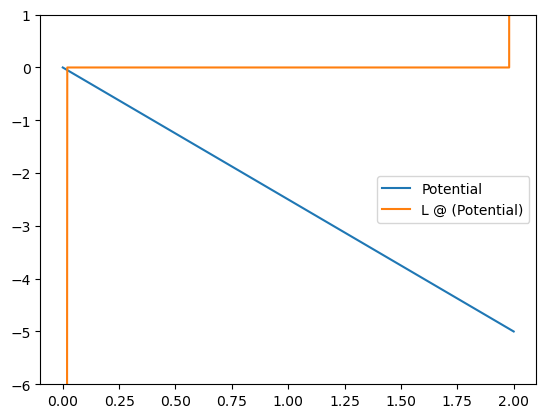

In [19]:
import matplotlib.pyplot as plt

plt.plot(x_arrange, Potential, label="Potential")
plt.plot(x_arrange, L @ Potential, label="L @ (Potential)")
plt.ylim(-6, 1)
plt.legend()
plt.show()

In [20]:
n = len(L)
print(
    "Does L @ (Potential) == 0? : ", 
    np.allclose(L @ Potential, np.zeros(shape=(n)))
)
print("Since f''(x0) and f''(xn) can not be calculated by equation, \
L @ (Potential) can be non-zero at boundaries.", end="\n\n")

print(
    "L @ (Potential) == 0", 
    np.isclose(L @ Potential, np.zeros((n))), sep="\n"
)

Does L @ (Potential) == 0? :  False
Since f''(x0) and f''(xn) can not be calculated by equation, L @ (Potential) can be non-zero at boundaries.

L @ (Potential) == 0
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False]
